In [123]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [98]:
data = pd.read_csv('../Data/train.csv', index_col = False)
data = data.drop(['Unnamed: 0'], axis = 1)
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Question: Những bài nhạc chứa nội dung phản cảm có phổ biến và được mọi người nghe không? 

**Mục đích:**
* Xem độ phổ biến của các bài nhạc mang tính chất phản cảm có được nhiều người quan tâm và ủng hộ hay không.
* Xu hướng nghe nhạc của mọi người có phải là những bài nhạc phản cảm hay không.
* Ảnh hưởng của nhạc phản cảm đối với âm nhạc và người nghe như thế nào.


**Ý nghĩa:**
* Việc phổ biến của nhạc phản cảm có thể gây ảnh hưởng xấu về mặt tư tưởng và tinh thần của mọi người. Nếu các bài nhạc phản cảm quá phổ biến nó sẽ gây ra các tư tưởng lệch lạc và gây hại rất nhiều nhất là đối với giới trẻ. Vì thế thông qua câu hỏi này chúng ta có thể biết được mức độ phổ biến của nhạc phản cảm và cần có những giải pháp hợp lí cho vấn đề đó.

### Bước 1: Kiểm tra dữ liệu nhạc phản cảm và không phản cảm chiếm bao nhiêu % 

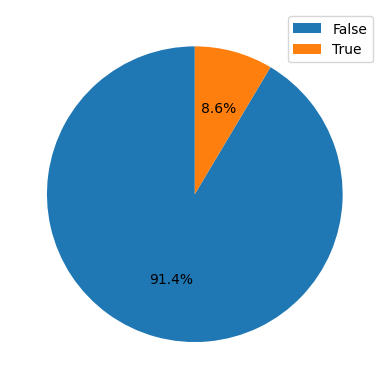

In [99]:
# Dem so luong cac bai hat chua noi dung phan cam va khong chua noi dung phan cam
df_explicit = data['explicit'].value_counts()

labels = df_explicit.keys()
sizes = (df_explicit.values / len(data['explicit'])) * 100

patches = plt.pie(sizes, autopct='%1.1f%%', startangle = 90) 
plt.legend(patches, labels = labels, loc = 'best')   

plt.show()

- Từ biểu đồ ta có thể thấy được là đa số các bài nhạc đều là nhạc không phản cảm và chiếm tới 91,4%.
- Trong khi đó những bài nhạc chứa từ ngữ phản cảm chỉ chiếm 8,6% rất ít so với những bài hát không phản cảm.

### Bước 2: Kiểm tra sự ảnh hưởng của nhạc chứa nội dung phản cảm đối với các thuộc tính khác của bài nhạc.

In [100]:
# Kiem tra su anh huong cua nhac chua noi dung phan cam voi cac thuoc tinh khac cua bai nhac
df_explicit_comparison = data.groupby('explicit').mean(numeric_only = True)

df_explicit_comparison.reset_index(inplace = True)

print(df_explicit_comparison)

   explicit  popularity    duration_ms  danceability    energy       key  \
0     False   32.937891  230170.299617      0.560299  0.633926  5.304260   
1      True   36.454191  205127.650457      0.636330  0.721139  5.361342   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0 -8.425947  0.643022     0.074696      0.324508          0.165837  0.211658   
1 -6.472891  0.579050     0.191139      0.212247          0.051366  0.233819   

    valence       tempo  time_signature  
0  0.474336  122.173653        3.898957  
1  0.471202  121.871713        3.958346  


### Vẽ biểu đồ trực quan kết quả trên một số thuộc tính.

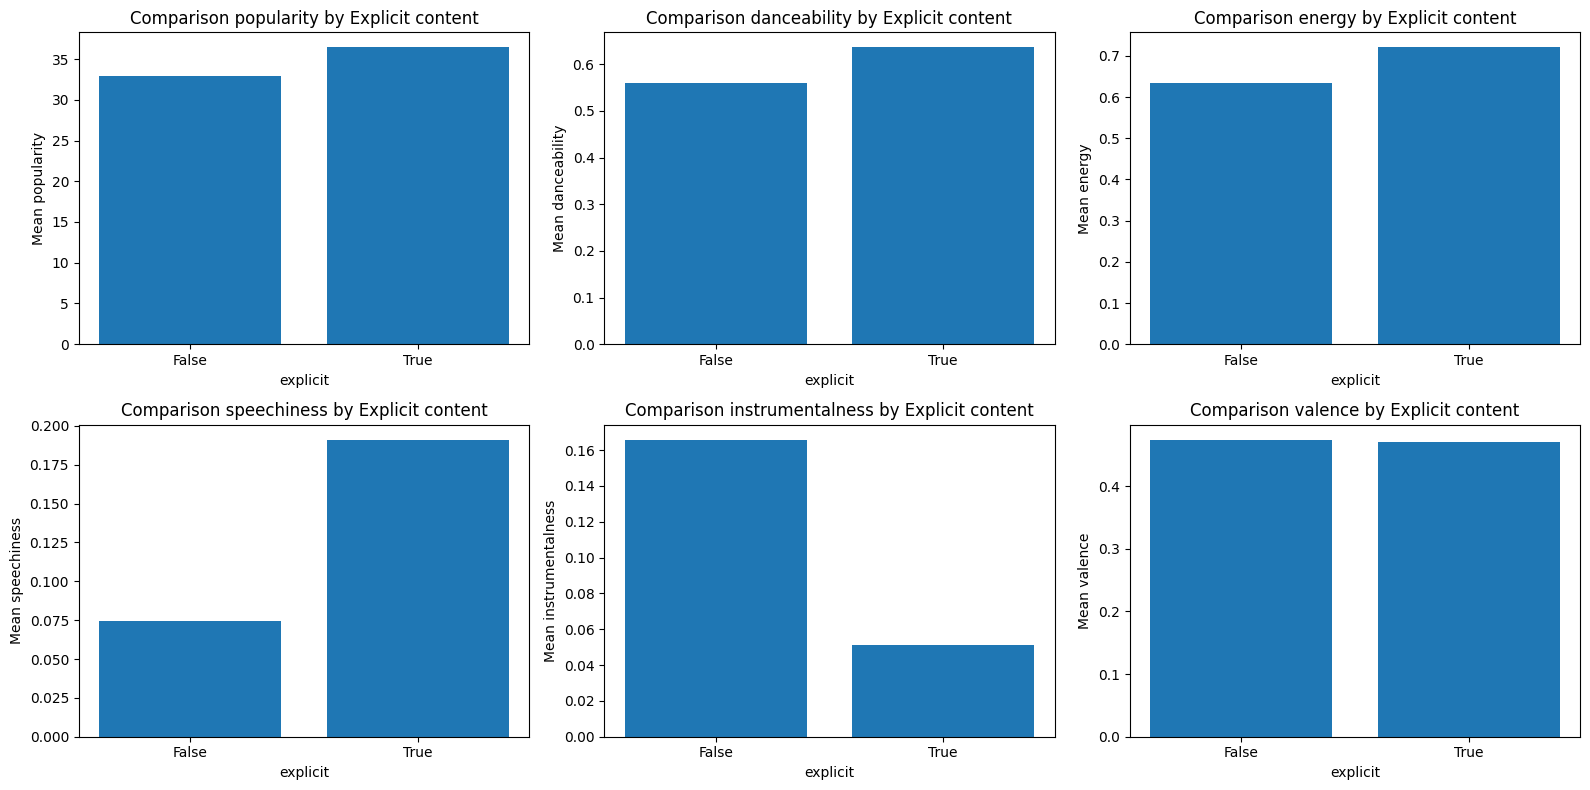

In [101]:
# Visualize coi cac thuoc tinh dac trung
attribute_comparison = ['popularity', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'valence']

fig, axes = plt.subplots(2, 3, figsize = (16, 8))

for i, ax in enumerate(axes.flatten()):
    ax.set_axisbelow(True)
    ax.bar(['False', 'True'], df_explicit_comparison[attribute_comparison[i]])
    ax.set_title(f'Comparison {attribute_comparison[i]} by Explicit content')
    ax.set_xlabel(f'explicit')
    ax.set_ylabel(f'Mean {attribute_comparison[i]}')

plt.tight_layout()
plt.show()

**Explicit và Popularity**:
- Trung bình các bản nhạc có nội dung phản cảm ít phổ biến hơn những bản nhạc không có nội dung phản cảm (32,94 < 36,45).
- Điều này cho thấy các bài nhạc không có nội dung phản cảm thường phổ biến hơn những bài nhạc có nội dung phản cảm.

**Explicit và các thuộc tính khác**:
- **Duration**: Các bản nhạc không có nội dung phản cảm có xu hướng ngắn hơn trung bình (205.128 mili giây so với 230.170 mili giây).
- **Danceability**: Các bản nhạc không có nội dung phản cảm có xu hướng dễ nhảy hơn (0,636 so với 0,560).
- **Energy**: Các bản nhạc không có nội dung phản cảm có xu hướng có năng lượng cao hơn (0,721 so với 0,634).
- **Loudness**: Các bản nhạc không có nội dung phản cảm to hơn đáng kể (-6,473 so với -8,426).
- **Speechiness**: Các bản nhạc không có nội dung phản cảm có nhiều từ được nói hơn (0,191 so với 0,075).
- **Acousticness**: Các bản nhạc không có nội dung phản cảm có ít âm thanh hơn (0,212 so với 0,325).
- **Instrumentalness**: Các bản nhạc không có nội dung phản cảm ít có khả năng là nhạc cụ thuần túy (0,051 so với 0,166).

**Valence, Tempo, và Time Signature**
- Không có sự khác biệt đáng kể nào được quan sát thấy về hóa trị, nhịp độ hoặc ký hiệu thời gian giữa các bản nhạc có nội dung phản cảm và không có nội dung phản cảm.